
=== CNN数据预处理验证 ===
训练集图像形状: (50000, 1, 28, 28) (样本数, 通道数, 高, 宽)
单个样本形状: (1, 28, 28)
训练集标签形状: (50000,)
验证集图像形状: (320, 1, 28, 28)
像素值范围: [0.0, 1.0]


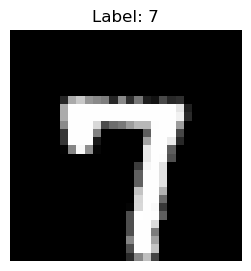

In [1]:
import gzip
import numpy as np
from struct import unpack
import pickle
import mynn as nn

# 固定随机种子
np.random.seed(309)

# 数据路径
train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

# 加载图像数据
with gzip.open(train_images_path, 'rb') as f:
    magic, num, rows, cols = unpack('>4I', f.read(16))
    train_imgs = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)  # shape (60000, 28, 28)
    train_imgs = train_imgs[:, np.newaxis, :, :]  # 最终shape (60000, 1, 28, 28)

# 加载标签数据
with gzip.open(train_labels_path, 'rb') as f:
    magic, num = unpack('>2I', f.read(8))
    train_labs = np.frombuffer(f.read(), dtype=np.uint8)

# 数据划分
idx = np.random.permutation(np.arange(num))
train_imgs = train_imgs[idx]
train_labs = train_labs[idx]
valid_imgs = train_imgs[:320]
valid_labs = train_labs[:320]
train_imgs = train_imgs[10000:]
train_labs = train_labs[10000:]

# 归一化
train_imgs = train_imgs / 255.0  
valid_imgs = valid_imgs / 255.0


print("\n=== CNN数据预处理验证 ===")
print(f"训练集图像形状: {train_imgs.shape} (样本数, 通道数, 高, 宽)")
print(f"单个样本形状: {train_imgs[0].shape}")
print(f"训练集标签形状: {train_labs.shape}")
print(f"验证集图像形状: {valid_imgs.shape}")
print(f"像素值范围: [{train_imgs.min()}, {train_imgs.max()}]")

# 可视化第一个样本
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.imshow(train_imgs[0][0], cmap='gray')  
plt.title(f"Label: {train_labs[0]}")
plt.axis('off')
plt.show()

In [2]:
CNN_model=nn.models.Model_CNN()
""" conv2D(in_channels=1, out_channels=6, kernel_size=5, padding=2),  # 输出 [batch, 6, 28, 28]
            ReLU(),
           

            Flatten(),  # 输出 [batch, 32*20*20]
            Linear(in_dim=6 * 28 * 28, out_dim=10) , # 输出 [batch, 10]"""


optimizer = nn.optimizer.SGD(init_lr=0.01, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 16.54037645117124, score: 0.09375
[Dev] loss: 16.401676601236286, score: 0.094
epoch: 0, iteration: 100
[Train] loss: 11.74539197231876, score: 0.25
[Dev] loss: 11.309151170173397, score: 0.306
epoch: 0, iteration: 200
[Train] loss: 7.412734234720032, score: 0.53125
[Dev] loss: 8.548289912083607, score: 0.464
epoch: 0, iteration: 300
[Train] loss: 4.911106699944508, score: 0.65625
[Dev] loss: 6.7769397162637866, score: 0.558
epoch: 0, iteration: 400
[Train] loss: 6.567631604544635, score: 0.59375
[Dev] loss: 5.776305730500354, score: 0.612
epoch: 0, iteration: 500
[Train] loss: 4.275331303346313, score: 0.71875
[Dev] loss: 5.069775329829601, score: 0.658
epoch: 0, iteration: 600
[Train] loss: 3.4972706925845585, score: 0.75
[Dev] loss: 4.549535392473795, score: 0.684
epoch: 0, iteration: 700
[Train] loss: 4.445674055234516, score: 0.71875
[Dev] loss: 4.161282687767456, score: 0.7
epoch: 0, iteration: 800
[Train] loss: 4.2976976465221535, score: 0.68

In [2]:
CNN_model=nn.models.Model_CNN()
"""       conv2D(in_channels=1, out_channels=6, kernel_size=5, padding=2),  # 输出 [batch, 6, 28, 28]

            conv2D(in_channels=6, out_channels=16, kernel_size=3, padding=0)

            Flatten(),
            
        
"""

optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=20, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.269388196830345, score: 0.0625
[Dev] loss: 16.454170808219526, score: 0.103125
epoch: 0, iteration: 100
[Train] loss: 3.453564479136238, score: 0.8125
[Dev] loss: 4.21972055602634, score: 0.75625
epoch: 0, iteration: 200
[Train] loss: 1.7457439243595938, score: 0.90625
[Dev] loss: 3.544004452753788, score: 0.796875
epoch: 0, iteration: 300
[Train] loss: 2.879118023998947, score: 0.84375
[Dev] loss: 2.5964218710617786, score: 0.853125
epoch: 0, iteration: 400
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 2.704101647283122, score: 0.84375
epoch: 0, iteration: 500
[Train] loss: 3.4446682082246207, score: 0.8125
[Dev] loss: 2.6719512462270645, score: 0.84375
epoch: 0, iteration: 600
[Train] loss: 2.33486720547986, score: 0.84375
[Dev] loss: 2.3553238923997406, score: 0.859375
epoch: 0, iteration: 700
[Train] loss: 1.7736552814218145, score: 0.875
[Dev] loss: 1.9646748459671186, score: 0.884375
epoch: 0, iteration: 800
[Train] loss: 1.3504

In [2]:
CNN_model=nn.models.Model_CNN()
"""       conv2D(in_channels=1, out_channels=6, kernel_size=5, padding=2),  # 输出 [batch, 6, 28, 28]
            max_pool(), #6*14*14
            conv2D(in_channels=6, out_channels=16, kernel_size=3, padding=0), #16*12*12
            max_pool(),

            Flatten(),
            Linear(in_dim=576,out_dim=10) , # 输出 [batch, 10]"""


optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 13.815510555475644, score: 0.25
[Dev] loss: 14.518848156049586, score: 0.203125
epoch: 0, iteration: 100
[Train] loss: 2.7335743191736093, score: 0.84375
[Dev] loss: 3.149103768089488, score: 0.815625
epoch: 0, iteration: 200
[Train] loss: 3.4113499405048904, score: 0.8125
[Dev] loss: 2.1233851736377667, score: 0.875
epoch: 0, iteration: 300
[Train] loss: 1.1512903955919886, score: 0.9375
[Dev] loss: 1.8062419392914826, score: 0.89375
epoch: 0, iteration: 400
[Train] loss: 1.151292537122023, score: 0.9375
[Dev] loss: 1.63712693246421, score: 0.909375
epoch: 0, iteration: 500
[Train] loss: 2.200807014639997, score: 0.875
[Dev] loss: 1.7066910637072752, score: 0.9
epoch: 0, iteration: 600
[Train] loss: 1.7268418038153426, score: 0.90625
[Dev] loss: 1.3307690643823373, score: 0.921875
epoch: 0, iteration: 700
[Train] loss: 2.029760407407785, score: 0.84375
[Dev] loss: 1.6622387308965565, score: 0.90625
epoch: 0, iteration: 800
[Train] loss: 1.356484705

In [2]:
CNN_model=nn.models.Model_CNN()



optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=8, log_iters=200, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 13.815510555475644, score: 0.25
[Dev] loss: 14.518848156049586, score: 0.203125
epoch: 0, iteration: 200
[Train] loss: 3.4113499405048904, score: 0.8125
[Dev] loss: 2.1233851736377667, score: 0.875
epoch: 0, iteration: 400
[Train] loss: 1.151292537122023, score: 0.9375
[Dev] loss: 1.63712693246421, score: 0.909375
epoch: 0, iteration: 600
[Train] loss: 1.7268418038153426, score: 0.90625
[Dev] loss: 1.3307690643823373, score: 0.921875
epoch: 0, iteration: 800
[Train] loss: 1.3564847056289047, score: 0.90625
[Dev] loss: 1.3075607756537155, score: 0.925
epoch: 0, iteration: 1000
[Train] loss: 0.5756462635610116, score: 0.96875
[Dev] loss: 1.1722467632099365, score: 0.93125
epoch: 0, iteration: 1200
[Train] loss: 1.1513055987834402, score: 0.9375
[Dev] loss: 1.069422828868022, score: 0.93125
epoch: 0, iteration: 1400
[Train] loss: 1.1512925371220217, score: 0.9375
[Dev] loss: 0.9567526638635077, score: 0.9375
best accuracy performence has been updated: 

KeyboardInterrupt: 

with dropout:

In [2]:
CNN_model=nn.models.Model_CNN()
"""       conv2D(in_channels=1, out_channels=6, kernel_size=5, padding=2),  # 输出 [batch, 6, 28, 28]
            max_pool(), #6*14*14
            conv2D(in_channels=6, out_channels=16, kernel_size=3, padding=0), #16*12*12
            max_pool(),

            Flatten(),

            Dropout(p=0.8),

            Linear(in_dim=576,out_dim=10) , # 输出 [batch, 10]"""



optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=200, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 13.239863807198955, score: 0.28125
[Dev] loss: 14.823771438778067, score: 0.1875
epoch: 0, iteration: 200
[Train] loss: 4.382827223813916, score: 0.75
[Dev] loss: 2.9924818854536213, score: 0.828125
epoch: 0, iteration: 400
[Train] loss: 1.6266698537423958, score: 0.90625
[Dev] loss: 1.8848304215638811, score: 0.878125
epoch: 0, iteration: 600
[Train] loss: 2.370915676434466, score: 0.84375
[Dev] loss: 1.6007954762971894, score: 0.909375
epoch: 0, iteration: 800
[Train] loss: 1.162307413154779, score: 0.9375
[Dev] loss: 1.3896738406832714, score: 0.915625
epoch: 0, iteration: 1000
[Train] loss: 0.5756462635262455, score: 0.96875
[Dev] loss: 1.4423090392453766, score: 0.909375
epoch: 0, iteration: 1200
[Train] loss: 1.387283965568245, score: 0.90625
[Dev] loss: 1.3034538794132016, score: 0.91875
epoch: 0, iteration: 1400
[Train] loss: 2.302562656111307, score: 0.875
[Dev] loss: 1.2487093514633085, score: 0.921875
best accuracy performence has been up

In [2]:
CNN_model=nn.models.Model_CNN()
"""       conv2D(in_channels=1, out_channels=6, kernel_size=5, padding=2),  # 输出 [batch, 6, 28, 28]
            max_pool(), #6*14*14
            conv2D(in_channels=6, out_channels=16, kernel_size=3, padding=0), #16*12*12
            max_pool(),

            Flatten(),

            Dropout(p=0.2),

            Linear(in_dim=576,out_dim=10) , # 输出 [batch, 10]"""



optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=200, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 16.118087565621614, score: 0.125
[Dev] loss: 16.303826598164772, score: 0.109375
epoch: 0, iteration: 200
[Train] loss: 3.8470844986609523, score: 0.75
[Dev] loss: 3.3799454423257935, score: 0.80625
epoch: 0, iteration: 400
[Train] loss: 1.5728545034218684, score: 0.90625
[Dev] loss: 2.1498218401344222, score: 0.878125
epoch: 0, iteration: 600
[Train] loss: 1.7258593913945055, score: 0.90625
[Dev] loss: 1.767841090214991, score: 0.89375
epoch: 0, iteration: 800
[Train] loss: 1.0502885545905838, score: 0.90625
[Dev] loss: 1.5140448253593513, score: 0.903125
epoch: 0, iteration: 1000
[Train] loss: 0.5370872853090847, score: 0.96875
[Dev] loss: 1.2286199222913283, score: 0.9125
epoch: 0, iteration: 1200
[Train] loss: 0.5768885656654171, score: 0.96875
[Dev] loss: 1.4259499871913708, score: 0.915625
epoch: 0, iteration: 1400
[Train] loss: 1.7275718778755733, score: 0.90625
[Dev] loss: 1.199405249855048, score: 0.921875
best accuracy performence has been


=== CNN数据预处理验证 ===
训练集图像形状: (50000, 1, 28, 28) (样本数, 通道数, 高, 宽)
单个样本形状: (1, 28, 28)
训练集标签形状: (50000,)
验证集图像形状: (320, 1, 28, 28)
像素值范围: [0.0, 1.0]


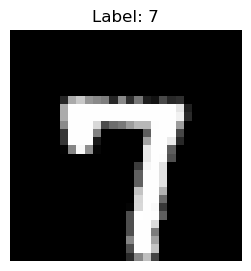

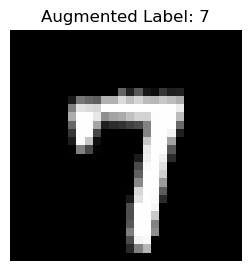

In [2]:
from torchvision import transforms

np.random.seed(309)

train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

# 加载图像数据
with gzip.open(train_images_path, 'rb') as f:
    magic, num, rows, cols = unpack('>4I', f.read(16))
    train_imgs = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)  # shape (60000, 28, 28)
    train_imgs = train_imgs[:, np.newaxis, :, :]  # 最终shape (60000, 1, 28, 28)

# 加载标签数据
with gzip.open(train_labels_path, 'rb') as f:
    magic, num = unpack('>2I', f.read(8))
    train_labs = np.frombuffer(f.read(), dtype=np.uint8)

# 数据划分
idx = np.random.permutation(np.arange(num))
train_imgs = train_imgs[idx]
train_labs = train_labs[idx]
valid_imgs = train_imgs[:320]
valid_labs = train_labs[:320]
train_imgs = train_imgs[10000:]
train_labs = train_labs[10000:]

# 归一化
train_imgs = train_imgs / 255.0  
valid_imgs = valid_imgs / 255.0


print("\n=== CNN数据预处理验证 ===")
print(f"训练集图像形状: {train_imgs.shape} (样本数, 通道数, 高, 宽)")
print(f"单个样本形状: {train_imgs[0].shape}")
print(f"训练集标签形状: {train_labs.shape}")
print(f"验证集图像形状: {valid_imgs.shape}")
print(f"像素值范围: [{train_imgs.min()}, {train_imgs.max()}]")


plt.figure(figsize=(6,3))
plt.imshow(train_imgs[0][0], cmap='gray')  
plt.title(f"Label: {train_labs[0]}")
plt.axis('off')  
plt.show()



# 定义数据增强的变换
transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.01, 0.01), scale=(0.9, 1.1), shear=5),  # 随机仿射变换
    transforms.RandomRotation(degrees=5),  # 随机旋转
    transforms.RandomResizedCrop(size=(28, 28), scale=(0.9, 1.0)),  # 随机裁剪
    transforms.ToTensor(),  # 转换为Tensor

])


sample_img = train_imgs[0][0]  

# 转换为PIL图像来使用 torchvision.transforms
from PIL import Image
sample_img_pil = Image.fromarray((sample_img * 255).astype(np.uint8))

# 应用数据增强变换
augmented_img = transform(sample_img_pil)

# 可视化增强后的图像
plt.figure(figsize=(6,3))
plt.imshow(augmented_img.squeeze(), cmap='gray')  
plt.title(f"Augmented Label: {train_labs[0]}")
plt.axis('off')  
plt.show()

In [3]:
print(augmented_img.shape)

torch.Size([1, 28, 28])


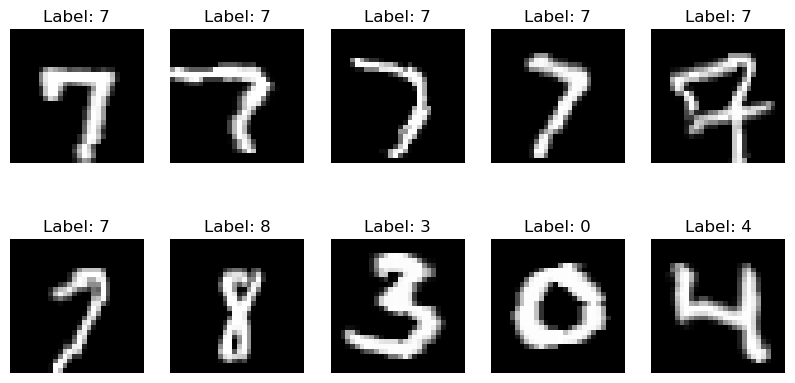

In [3]:

augmented_train_imgs = []

for img in train_imgs:
    # 转换为PIL图像以使用 torchvision 的 transforms
    img_pil = Image.fromarray((img[0] * 255).astype(np.uint8))  # train_imgs 是 [batch, 1, 28, 28]
    
    augmented_img = transform(img_pil)
    
    
    augmented_train_imgs.append(augmented_img.numpy())  


augmented_train_imgs = np.array(augmented_train_imgs)

# 查看增强后的前几个图像
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(augmented_train_imgs[i][0], cmap='gray')  
    ax.set_title(f"Label: {train_labs[i]}")
    ax.axis('off')
plt.show()

In [5]:
print(augmented_train_imgs.shape)

(50000, 1, 28, 28)


In [4]:
CNN_model=nn.models.Model_CNN()



optimizer = nn.optimizer.SGD(init_lr=0.03, model=CNN_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[2000, 4000, 8000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=CNN_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(CNN_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([augmented_train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=200, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 15.54244937614731, score: 0.15625
[Dev] loss: 16.005892328112743, score: 0.125
epoch: 0, iteration: 200
[Train] loss: 7.259434133319919, score: 0.59375
[Dev] loss: 2.926403623087519, score: 0.83125
epoch: 0, iteration: 400
[Train] loss: 3.0060861693158114, score: 0.8125
[Dev] loss: 2.0591788444388275, score: 0.86875
epoch: 0, iteration: 600
[Train] loss: 1.7344992437654847, score: 0.90625
[Dev] loss: 1.9710259702497652, score: 0.8875
epoch: 0, iteration: 800
[Train] loss: 2.1072857493292023, score: 0.875
[Dev] loss: 2.0197595388714213, score: 0.884375
epoch: 0, iteration: 1000
[Train] loss: 2.0031870754582894, score: 0.875
[Dev] loss: 1.9048209226698596, score: 0.884375
epoch: 0, iteration: 1200
[Train] loss: -9.931154231497047e-09, score: 1.0
[Dev] loss: 1.311161761145183, score: 0.91875
epoch: 0, iteration: 1400
[Train] loss: 1.726938810690248, score: 0.90625
[Dev] loss: 1.317293189344301, score: 0.915625
best accuracy performence has been updated